In [1]:
# import libraries

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt, seaborn as sns

import librosa, librosa.display
import IPython.display as ipd

plt.rcParams['figure.figsize'] = (10, 3)

In [2]:
features_30_sec = pd.read_csv('C:/Users/Hany-mRm/Desktop/MSc/Research/Music Data/features_30_sec.csv')
features_3_sec  = pd.read_csv('C:/Users/Hany-mRm/Desktop/MSc/Research/Music Data/features_3_sec.csv')

data = features_30_sec
data.iloc[:,2:-1].describe()

chroma_stft_mean  chroma_stft_var     rms_mean      rms_var  \
count       1000.000000      1000.000000  1000.000000  1000.000000   
mean           0.378682         0.086340     0.130930     0.003051   
std            0.081705         0.007735     0.065683     0.003634   
min            0.171939         0.044555     0.005276     0.000004   
25%            0.319562         0.082298     0.086657     0.000942   
50%            0.383148         0.086615     0.122443     0.001816   
75%            0.435942         0.091256     0.175682     0.003577   
max            0.663685         0.108111     0.397973     0.027679   

       spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
count             1000.000000           1.000000e+03              1000.000000   
mean              2201.780898           4.696916e+05              2242.541070   
std                715.960600           4.008995e+05               526.316473   
min                570.040355           7.911251e+03               898.066208   
25%               1627.697311           1.843505e+05              1907.240605   
50%               2209.263090           3.384862e+05              2221.392843   
75%               2691.294667           6.121479e+05              2578.469836   
max               4435.243901           3.036843e+06              3509.646417   

       spectral_bandwidth_var  rolloff_mean   rolloff_var  ...  mfcc16_mean  \
count             1000.000000   1000.000000  1.000000e+03  ...  1000.000000   
mean            137079.155165   4571.549304  1.844345e+06  ...     1.148144   
std              96455.666326   1574.791602  1.425085e+06  ...     4.578948   
min              10787.185064    749.140636  1.468612e+04  ...   -15.693844   
25%              67376.554428   3380.069642  7.727312e+05  ...    -1.863280   
50%             111977.548036   4658.524473  1.476115e+06  ...     1.212809   
75%             182371.576801   5533.810460  2.555262e+06  ...     4.359662   
max             694784.811549   8677.672688  8.660900e+06  ...    13.457150   

        mfcc16_var  mfcc17_mean   mfcc17_var  mfcc18_mean   mfcc18_var  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     60.730958    -3.966028    62.633624     0.507696    63.712586   
std      33.781951     4.549697    33.479172     3.869105    34.401977   
min       9.169314   -17.234728    13.931521   -11.963694    15.420555   
25%      40.376442    -7.207225    40.830875    -2.007015    41.884240   
50%      52.325077    -4.065605    54.717674     0.669643    54.804890   
75%      71.691755    -0.838737    75.040838     3.119212    75.385832   
max     392.932373    11.482946   406.058868    15.388390   332.905426   

       mfcc19_mean   mfcc19_var  mfcc20_mean   mfcc20_var  
count  1000.000000  1000.000000  1000.000000  1000.000000  
mean     -2.328761    66.231930    -1.095348    70.126096  
std       3.755957    37.174631     3.837007    45.228512  
min     -18.501955    13.487622   -19.929634     7.956583  
25%      -4.662925    41.710184    -3.368996    42.372865  
50%      -2.393862    57.423059    -1.166289    59.186117  
75%       0.150573    78.626444     1.312615    85.375374  
max      14.694924   393.161987    15.369627   506.065155  

[8 rows x 57 columns]

In [3]:
path_audio = "C:/Users/Hany-mRm/Desktop/MSc/Research/Music Data/genres_original/classical/classical.00000.wav"
features = features_30_sec[features_30_sec.filename==path_audio.split('/')[-1]]

# Understanding Features

Let's take a look at an example of a single audio wav file.

In [4]:
y, sr = librosa.load(path_audio)

In [5]:
ipd.Audio(y, rate=sr)

In [6]:
print(f"- wav information - \n audio time series: {len(y)} \n sample rate: {sr} \n audio length: {len(y)/sr}")

- wav information - 
 audio time series: 661794 
 sample rate: 22050 
 audio length: 30.013333333333332


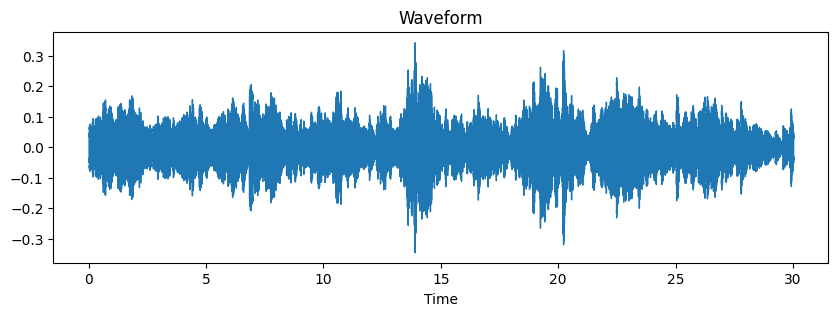

In [7]:
plt.title('Waveform')
librosa.display.waveshow(y=y,sr=sr)
plt.show()

Spectogram / Mel-spectogram

- log-frequency

In [8]:
# fft parameters
n_fft = 2048
hop_length = 512

# STFT
# The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.
D = librosa.stft(y=y, n_fft=2048, hop_length=hop_length, window='hann', center=True) #stft coefficient

# Amplitude
S, _ = librosa.magphase(D, power=1) # S = np.abs(D) energy
S_pw, _ = librosa.magphase(D, power=2) # S = np.abs(D)**2 power

In [9]:
print(S.shape)

(1025, 1293)


In [10]:
# Convert an amplitude spectrogram to dB-scaled spectrogram
S_dB = librosa.amplitude_to_db(S, ref=np.max)

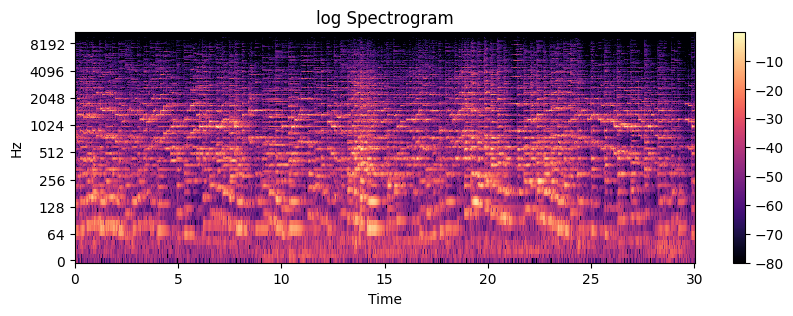

In [11]:
plt.title('log Spectrogram')
librosa.display.specshow(data=S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()

The Mel spectrogram is a spectrogram with a Mel scale on the y axis.

In [12]:
mel_S = librosa.feature.melspectrogram(y=y, sr=sr)
# or (same output)
mel_S = librosa.feature.melspectrogram(S=S) 

mel_S_dB = librosa.amplitude_to_db(mel_S, ref=np.max)

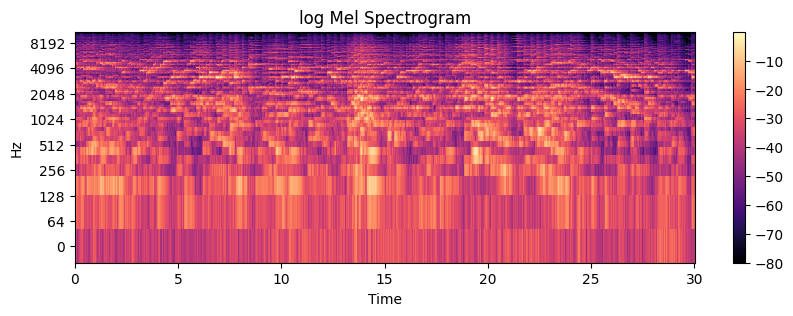

In [13]:
plt.title('log Mel Spectrogram')
librosa.display.specshow(mel_S_dB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log')
plt.colorbar()
plt.show()

# Extracting musical features from an audio file

## Zero crossing rate

In [14]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
print(f"- Zero Crossing Rate -\n shape: {zero_crossing_rate.shape} \n mean: {np.mean(zero_crossing_rate)} \n variance: {np.std(zero_crossing_rate)**2}")

- Zero Crossing Rate -
 shape: (1, 1293) 
 mean: 0.0982227015661253 
 variance: 0.0004313937769114764


In [15]:
# check
print(features.zero_crossing_rate_mean.values, features.zero_crossing_rate_var.values)

[0.0982227] [0.00043139]


## Harmonics-Percussive Source Separation

In [16]:
y_harm, y_perc = librosa.effects.hpss(y=y)

# or (same output)
D_harm, D_perc = librosa.decompose.hpss(D)
y_harm = librosa.istft(D_harm)
y_perc = librosa.istft(D_perc)

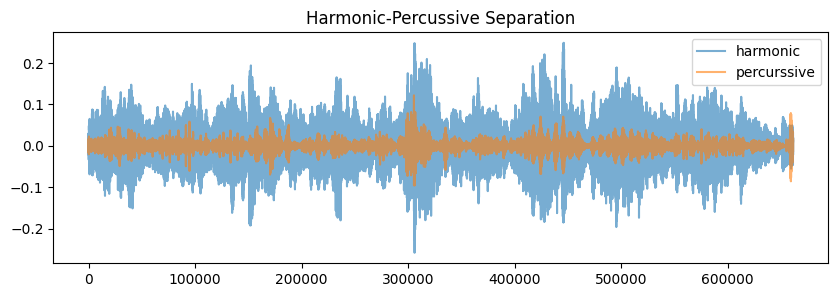

In [17]:
plt.title('Harmonic-Percussive Separation')
plt.plot(y_harm, alpha=.6)
plt.plot(y_perc, alpha=.6)
plt.legend(['harmonic','percurssive'])
plt.show()

In [18]:
print(f"- Harmonic y -\n shape: {y_harm.shape} \n mean: {np.mean(y_harm)} \n variance: {np.var(y_harm)}")
print()
print(f"- Percussive y -\n shape: {y_perc.shape} \n mean: {np.mean(y_perc)} \n variance: {np.var(y_perc)}")

- Harmonic y -
 shape: (661504,) 
 mean: -4.6485209168167785e-05 
 variance: 0.001230178284458816

- Percussive y -
 shape: (661504,) 
 mean: -0.00012128985690651461 
 variance: 6.028851930750534e-05


In [19]:
# check
print(features.harmony_mean.values, features.harmony_var.values)
print(features.perceptr_mean.values, features.perceptr_var.values)

[-4.66024067e-05] [0.00122963]
[-0.0001211] [6.0270424e-05]


## BPM tempo

In [20]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr, units='time')
print('BPM:', tempo)

BPM: 95.703125


In [21]:
print(features.tempo.values)

[95.703125]


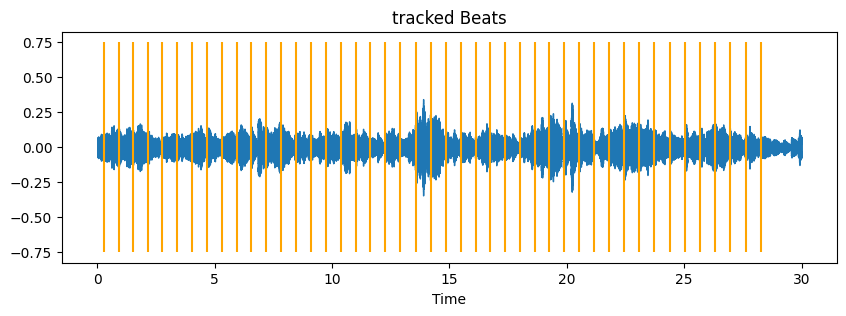

In [22]:
plt.title('tracked Beats')
librosa.display.waveshow(y=y,sr=sr)
plt.vlines(beats, ymin=-.75,ymax=.75, color='orange')
plt.show()

## Spectral centroids

In [23]:
# Calculate the Spectral Centroids
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
# or (same output)
centroid = librosa.feature.spectral_centroid(S=S)[0]

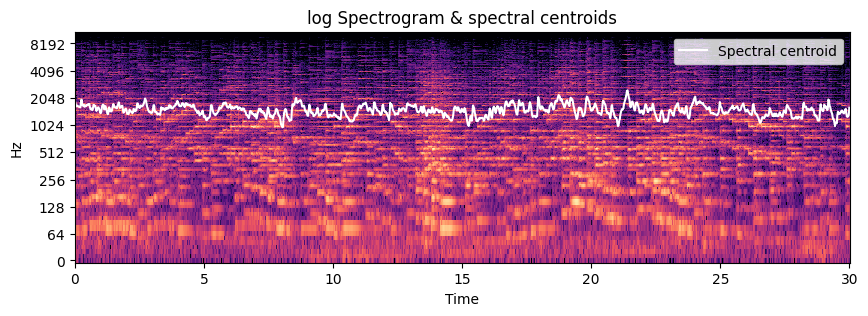

In [24]:
times = librosa.times_like(centroid)
fig, ax = plt.subplots()
librosa.display.specshow(S_dB, y_axis='log', x_axis='time', ax=ax)
ax.plot(times, centroid.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Spectrogram & spectral centroids')
plt.show()

In [25]:
print(f"- Spectral Centroids y -\n shape: {centroid.shape} \n mean: {np.mean(centroid)} \n variance: {np.var(centroid)}")

- Spectral Centroids y -
 shape: (1293,) 
 mean: 1505.3574604811247 
 variance: 44430.732827037886


In [26]:
print(features.spectral_centroid_mean.values, features.spectral_bandwidth_var.values)

[1505.16642397] [43682.97326723]


## Spectral bandwith

In [27]:
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]

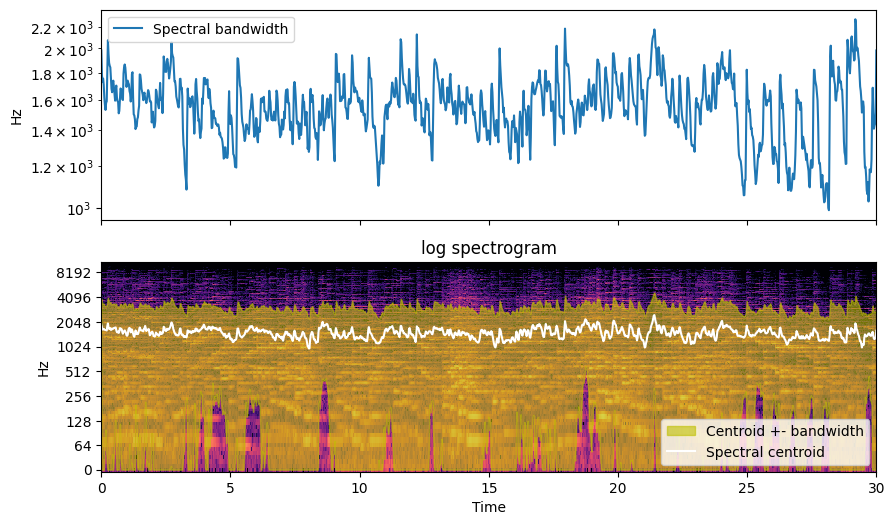

In [28]:
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10,6))
times = librosa.times_like(spec_bw)
ax[0].semilogy(times, spec_bw, label='Spectral bandwidth') #log-scaled
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(S_dB, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid - spec_bw),
                np.minimum(centroid + spec_bw, sr/2),
                alpha=0.6, label='Centroid +- bandwidth', color='y')
ax[1].plot(times, centroid, label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')
plt.show()

In [29]:
print(f"- Spectral Bandwidth y -\n shape: {spec_bw.shape} \n mean: {np.mean(spec_bw)} \n variance: {np.var(spec_bw)}")

- Spectral Bandwidth y -
 shape: (1293,) 
 mean: 1559.2288945546338 
 variance: 43765.3731231256


In [30]:
# check
print(features.spectral_bandwidth_mean.values, features.spectral_bandwidth_var.values)

[1559.00574034] [43682.97326723]


## Spectral rolloff

In [31]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.85)[0]

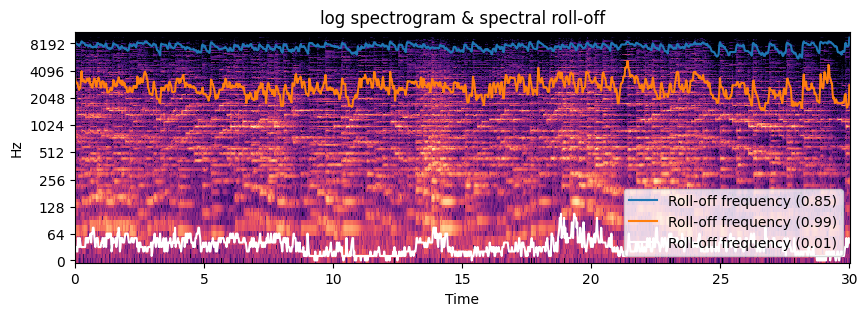

In [32]:
times = librosa.times_like(spectral_rolloff)

rolloff_max = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.99)
rolloff_min = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.01)

fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                          y_axis='log', x_axis='time', ax=ax)
ax.plot(times, rolloff_max[0], label='Roll-off frequency (0.85)')
ax.plot(times, spectral_rolloff, label='Roll-off frequency (0.99)')
ax.plot(times, rolloff_min[0], color='w', label='Roll-off frequency (0.01)')
ax.legend(loc='lower right')
ax.set(title='log spectrogram & spectral roll-off')
plt.show()

In [33]:
print(f"- Spectral Roll-off y -\n shape: {spectral_rolloff.shape} \n mean: {np.mean(spectral_rolloff)} \n variance: {np.var(spectral_rolloff)}")

- Spectral Roll-off y -
 shape: (1293,) 
 mean: 2717.238763866734 
 variance: 299014.0000693897


In [34]:
# check
print(features.rolloff_mean.values, features.rolloff_var.values)

[2716.30615801] [299398.30722597]


## MFCC (Mel-Frequency Cepstral Coefficients) 20

In [35]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
print('mfccs shape:', mfccs.shape)

mfccs shape: (20, 1293)


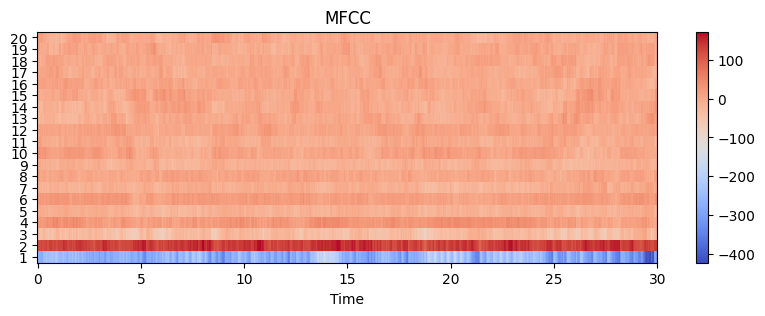

In [36]:
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
ax.set_yticks(range(0,20), labels=range(1,21))
plt.show()

In [37]:
for i in range(20):
    print(f"MFCC {i+1} \n mean: {mfccs[i].mean()}, variance: {mfccs[i].var()}")
    print()

MFCC 1 
 mean: -268.21856689453125, variance: 1791.935791015625

MFCC 2 
 mean: 135.68165588378906, variance: 188.9014129638672

MFCC 3 
 mean: -34.05637741088867, variance: 231.39031982421875

MFCC 4 
 mean: 25.616008758544922, variance: 169.41429138183594

MFCC 5 
 mean: -12.971722602844238, variance: 71.24927520751953

MFCC 6 
 mean: 17.90326499938965, variance: 74.56208801269531

MFCC 7 
 mean: -9.990859985351562, variance: 114.86929321289062

MFCC 8 
 mean: 5.634088516235352, variance: 65.84175872802734

MFCC 9 
 mean: -14.143672943115234, variance: 75.42843627929688

MFCC 10 
 mean: 7.493184566497803, variance: 177.2174530029297

MFCC 11 
 mean: -3.9764394760131836, variance: 106.70967102050781

MFCC 12 
 mean: 8.258308410644531, variance: 80.11543273925781

MFCC 13 
 mean: -1.3336011171340942, variance: 154.7423095703125

MFCC 14 
 mean: -0.35799506306648254, variance: 188.39491271972656

MFCC 15 
 mean: 1.0361008644104004, variance: 171.72482299804688

MFCC 16 
 mean: 3.7968225

In [38]:
# check
features.iloc[:,19:-1].T

100
mfcc1_mean   -268.195526
mfcc1_var    1792.286011
mfcc2_mean    135.691971
mfcc2_var     189.090881
mfcc3_mean    -34.051403
mfcc3_var     231.440308
mfcc4_mean     25.615507
mfcc4_var     169.200241
mfcc5_mean    -12.977585
mfcc5_var      71.468498
mfcc6_mean     17.902988
mfcc6_var      74.706894
mfcc7_mean     -9.990349
mfcc7_var     114.750702
mfcc8_mean      5.630702
mfcc8_var      65.850983
mfcc9_mean    -14.142573
mfcc9_var      75.537086
mfcc10_mean     7.490304
mfcc10_var    177.036102
mfcc11_mean    -3.969332
mfcc11_var    106.864899
mfcc12_mean     8.258574
mfcc12_var     80.119263
mfcc13_mean    -1.335326
mfcc13_var    154.534012
mfcc14_mean    -0.365052
mfcc14_var    188.326233
mfcc15_mean     1.039341
mfcc15_var    171.780548
mfcc16_mean     3.791384
mfcc16_var     86.137909
mfcc17_mean    -0.320783
mfcc17_var    100.827087
mfcc18_mean     1.772985
mfcc18_var     95.440735
mfcc19_mean     0.889234
mfcc19_var     97.133331
mfcc20_mean    -0.842025
mfcc20_var    120.865791

## Chroma STFT

In [39]:
# Chromogram
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=1024)
# or (same output)
chromagram = librosa.feature.chroma_stft(S=S_pw, hop_length=1024) # Increase hop_length
print('Chromogram shape:', chromagram.shape)

Chromogram shape: (12, 1293)


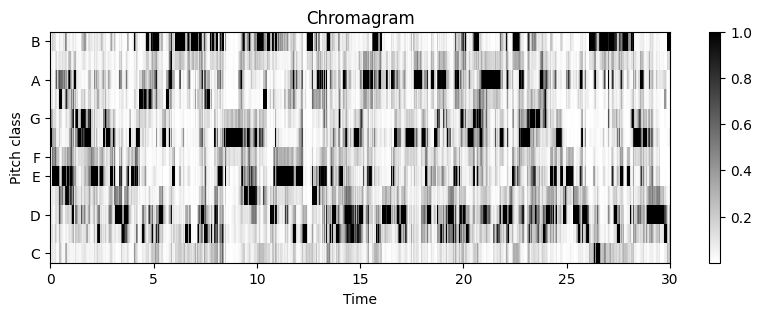

In [40]:
plt.title("Chromagram")
librosa.display.specshow(chromagram, y_axis='chroma', x_axis='time', cmap='gray_r')
plt.colorbar()
plt.show()

In [41]:
print(f"- Chroma STFT - \n mean: {chromagram.mean()}, variance: {chromagram.var()}")

- Chroma STFT - 
 mean: 0.25236058235168457, variance: 0.08414862304925919


In [42]:
# check
print(features.chroma_stft_mean.values, features.chroma_stft_var.values)

[0.25239193] [0.08415318]


## RMS

root-mean-square (RMS) value for each frame

In [43]:
rms = librosa.feature.rms(y=y)
# or (same output)
rms = librosa.feature.rms(S=librosa.stft(y, window=np.ones, center=False))

Text(0.5, 0, 'Time')

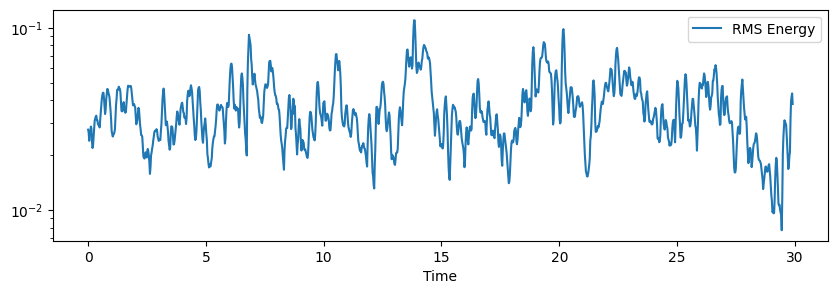

In [44]:
fig, ax = plt.subplots()
times = librosa.times_like(rms)
ax.semilogy(times, rms[0], label='RMS Energy') # log scaled
ax.legend()
ax.set_xlabel('Time')

In [45]:
print(f"- RMS - \n mean: {rms.mean()}, variance: {rms.var()}")

- RMS - 
 mean: 0.036271016922351365, variance: 0.00022120456117818396


In [46]:
# check 
print(features.rms_mean.values, features.rms_var.values)

[0.03624489] [0.00022075]


# Features EDA

- correlations
- Hierarchical dendrogram
- PCA and Factor Analysis

In [47]:
df_ft_mean = data[[col for col in data.columns if 'mean' in col]]
df_ft_var = data[[col for col in data.columns if 'var' in col]]

## correlation

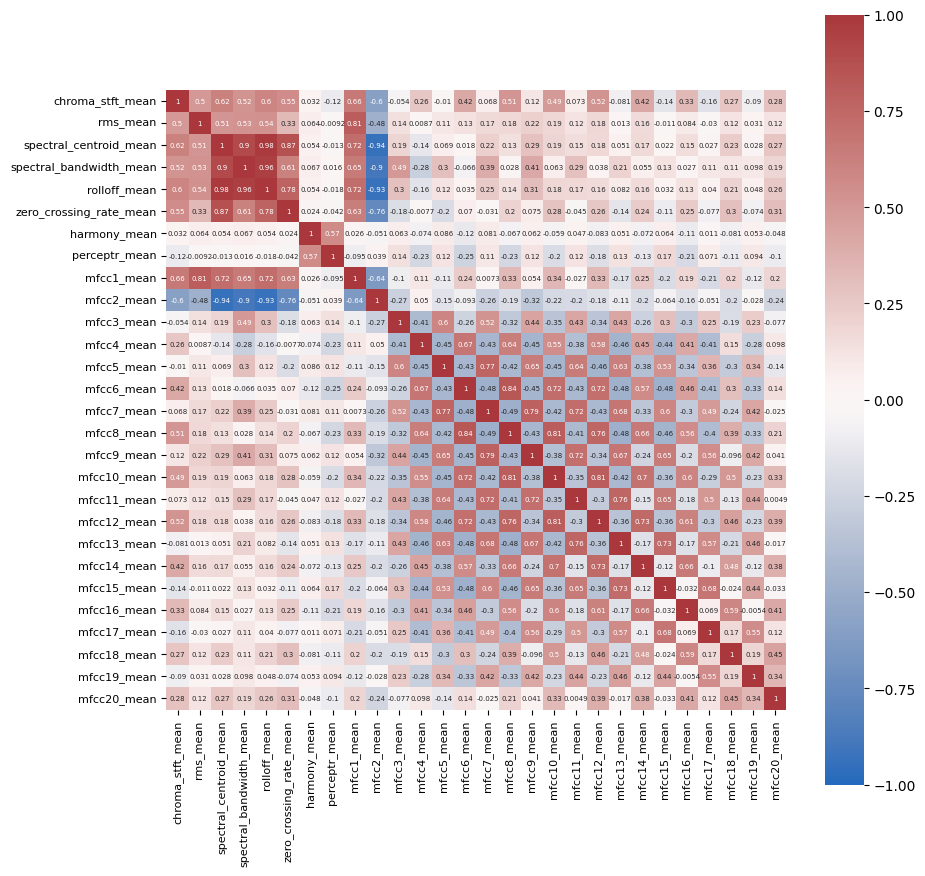

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df_ft_mean.corr(), cmap='vlag', vmin=-1, vmax=1,center=0, square=True, annot=True, annot_kws={'fontsize':5})
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

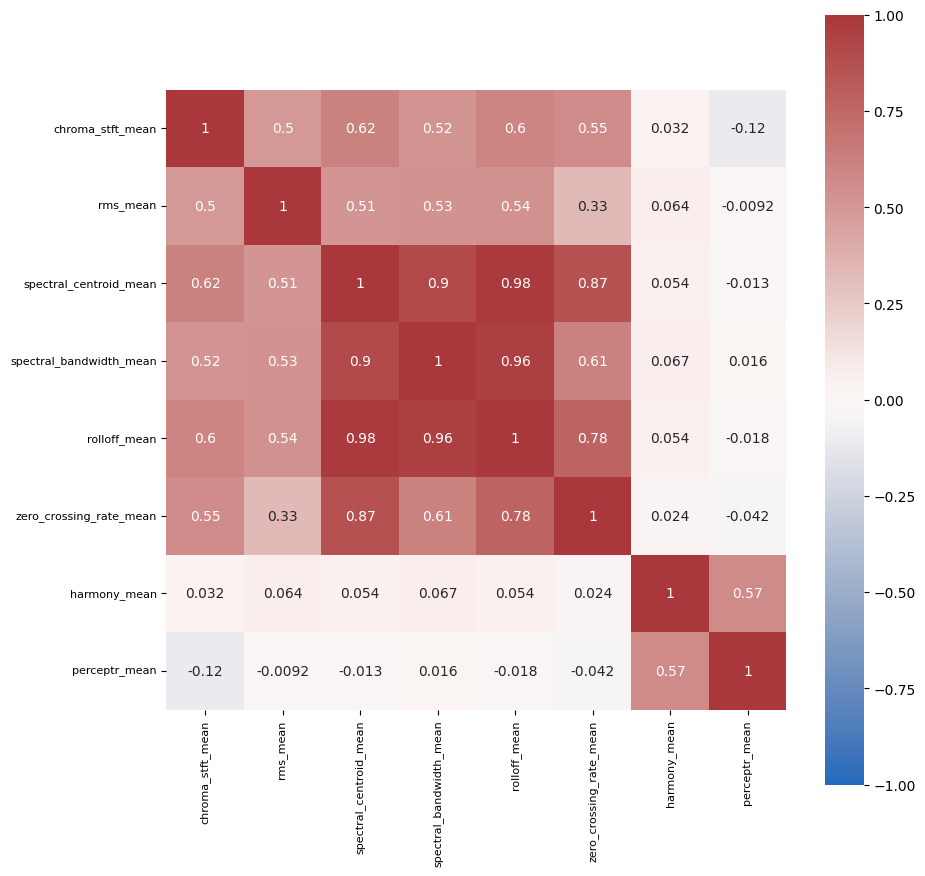

In [49]:
# excluding MFCCs
plt.figure(figsize=(10,10))
sns.heatmap(df_ft_mean.iloc[:,:8].corr(), cmap='vlag', vmin=-1, vmax=1,center=0, square=True, annot=True)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

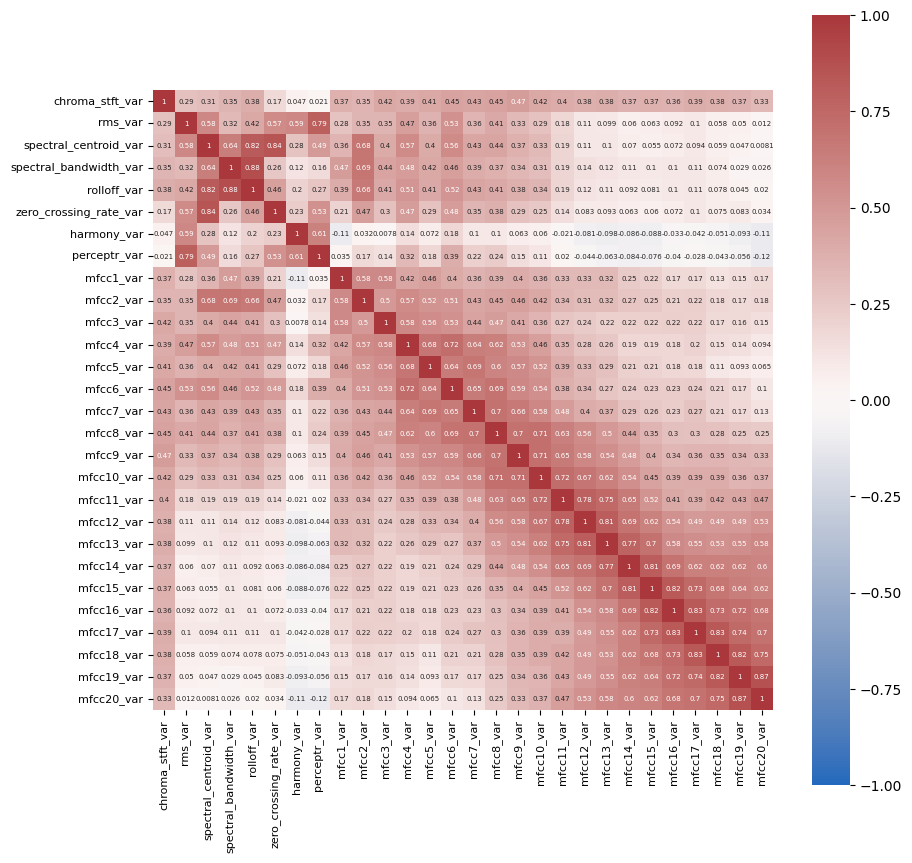

In [50]:
# variances
plt.figure(figsize=(10,10))
sns.heatmap(df_ft_var.corr(), cmap='vlag', vmin=-1, vmax=1,center=0, square=True, annot=True, annot_kws={'fontsize':5})
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

- spectral centroid mean& spectral bandwith mean & spectral rolloff mean have correlation coeff above 0.9
- mfcc2 mean has negative correlation of -0.9 with spectral features mean

## Hierarchical dendrogram

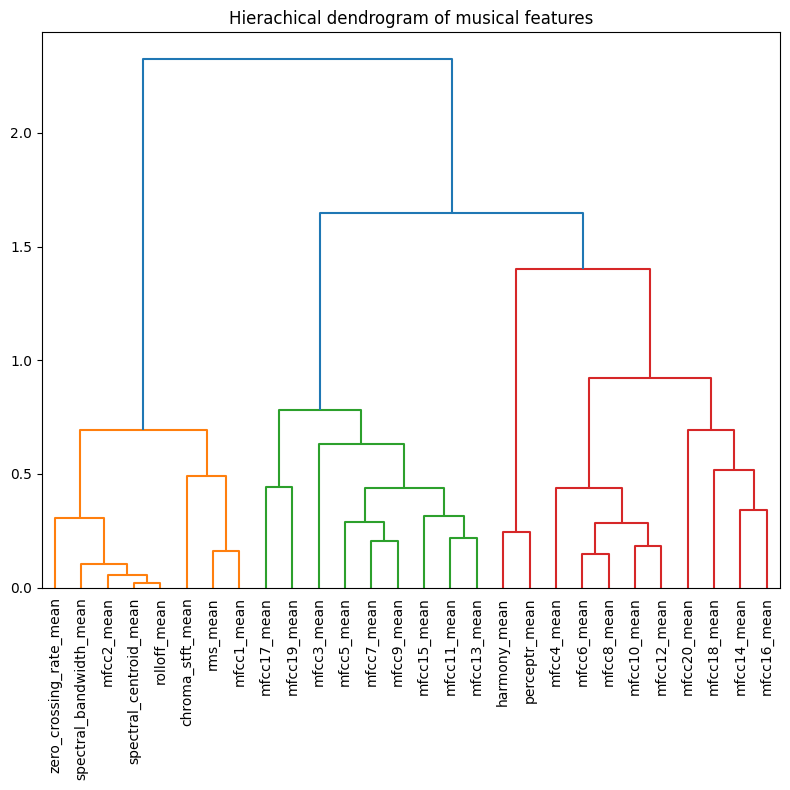

In [51]:
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

fig, ax = plt.subplots(1, figsize=(8, 8))
corr = spearmanr(df_ft_mean).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))

plt.title('Hierachical dendrogram of musical features')
dendro = hierarchy.dendrogram(
    dist_linkage, labels=df_ft_mean.columns, ax=ax, leaf_rotation=90
)
fig.tight_layout()
plt.show()

## PCA and Factor Analysis

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis

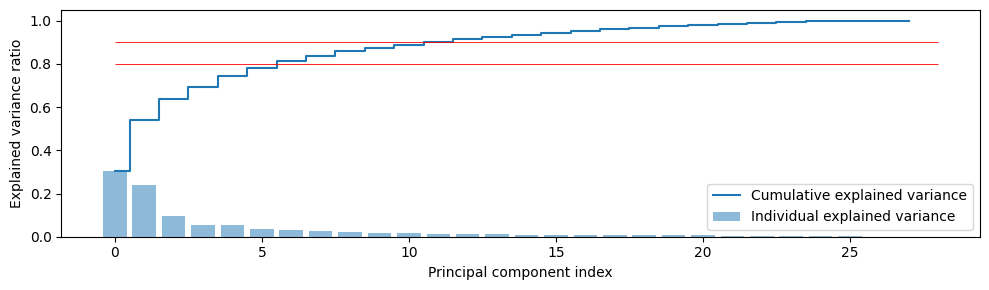

In [53]:
sc = StandardScaler()
df_ft_mean_scaled = sc.fit_transform(df_ft_mean)

pca = PCA()
ft_pca = pca.fit_transform(df_ft_mean_scaled)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.hlines(0.8, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.hlines(0.9, xmin=0, xmax=len(cum_sum_eigenvalues), color='red', linewidth=.6)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

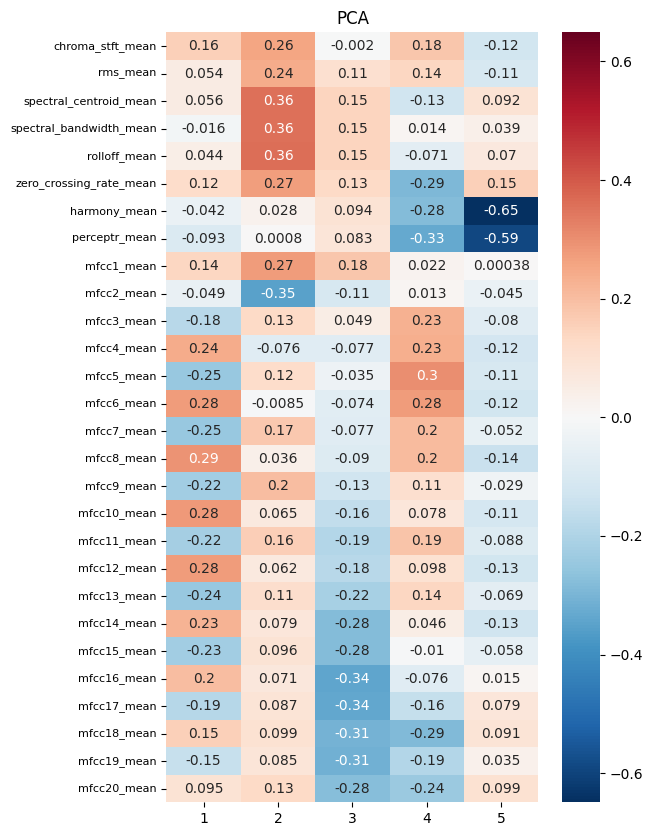

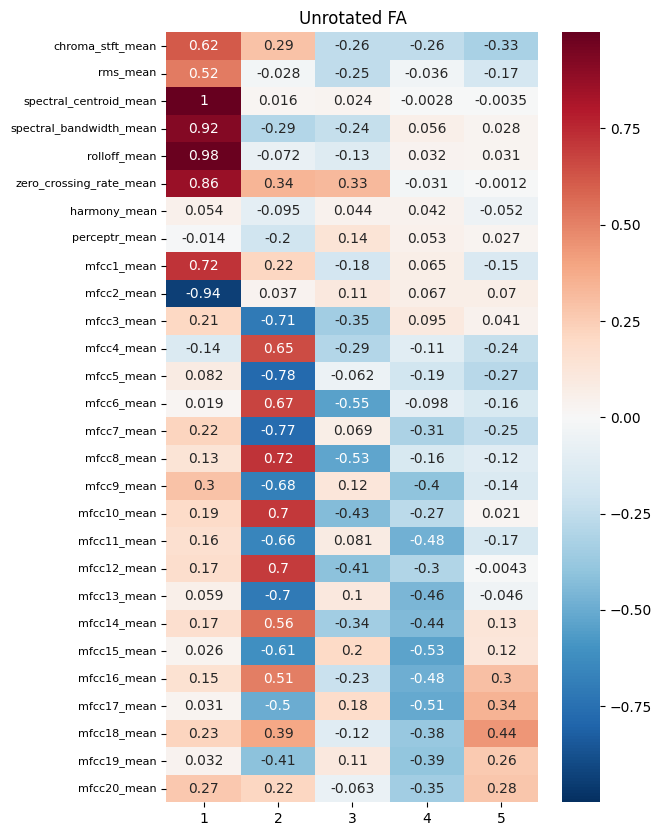

In [54]:
n_comps = 5 # 0.8 explained variance for pca
feature_names = df_ft_mean.columns

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
]

for (method, fa) in methods:
    fig, ax = plt.subplots(figsize=(6,10))
    fa.set_params(n_components=n_comps)
    fa.fit(df_ft_mean_scaled)

    components = fa.components_.T

    vmax = np.abs(components).max()
    sns.heatmap(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax, ax=ax, annot=True)
    ax.set_yticklabels(labels=feature_names, rotation=0, fontdict={'fontsize':8})
    ax.set_xticklabels(labels= range(1, n_comps+1))
    ax.set_title(str(method))
    plt.show()

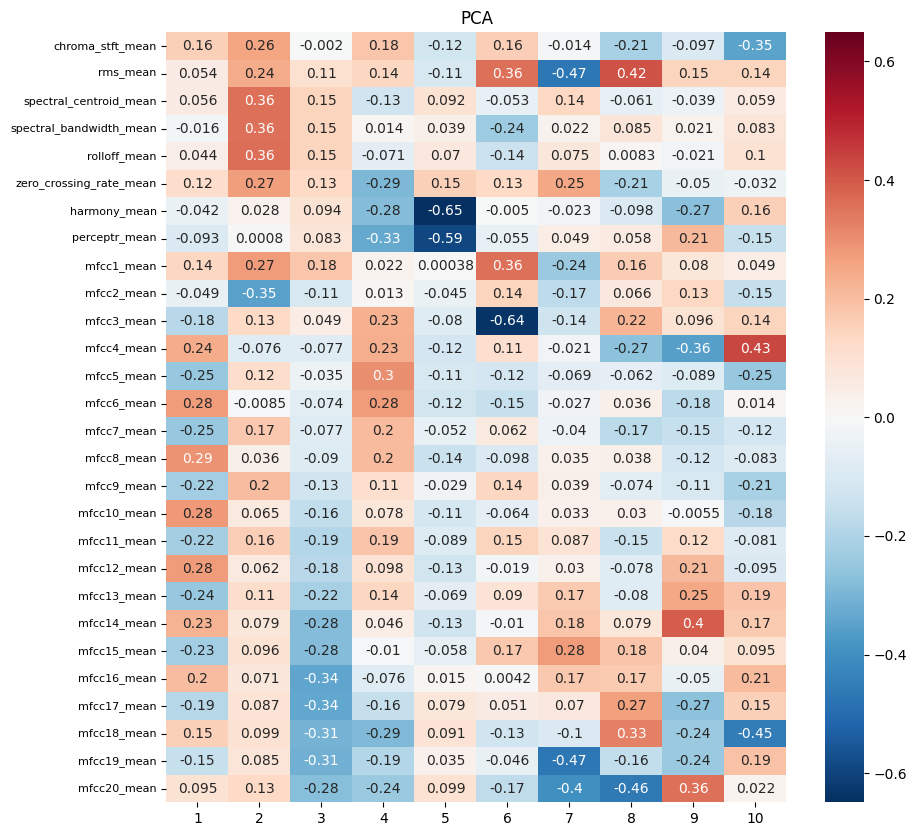

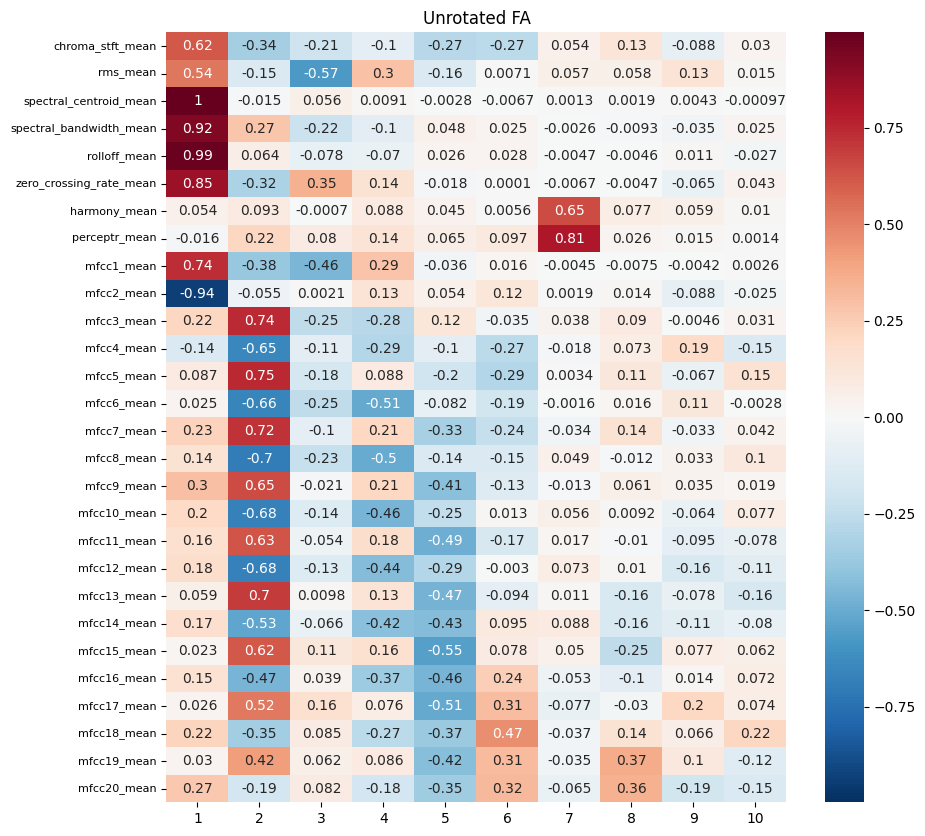

In [55]:
n_comps = 10 # 0.9 explained variance for pca
feature_names = df_ft_mean.columns

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
]

for (method, fa) in methods:
    fig, ax = plt.subplots(figsize=(10,10))
    fa.set_params(n_components=n_comps)
    fa.fit(df_ft_mean_scaled)

    components = fa.components_.T

    vmax = np.abs(components).max()
    sns.heatmap(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax, ax=ax, annot=True)
    ax.set_yticklabels(labels=feature_names, rotation=0, fontdict={'fontsize':8})
    ax.set_xticklabels(labels= range(1, n_comps+1))
    ax.set_title(str(method))
    plt.show()

## Data split (train/test)

In [84]:
data_each_song = features_30_sec

Split songs to train and test with 30 seconds data

In [85]:
X = data_each_song.drop(columns=['label'])
labels = data_each_song.loc[:,'label']
cat_y = pd.Categorical(labels)
y = pd.Series(cat_y.codes)

In [58]:
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
# train / test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123)

In [59]:
# songs to train
fn_train = np.sort(X_train.filename.values)

# songs to test
fn_test = np.sort(X_test.filename.values)
#print(fn_test)

Apply the splits to  3 seconds data

In [60]:
data = features_3_sec

In [86]:
songs = []
for i in range(len(data)):
    split = data.filename[i].split('.')
    songs.append(split[0]+'.'+split[1]+'.'+split[3])
data['songname'] = pd.Series(songs)


In [87]:
song_data_ = []
for song in fn_train:
    song_data_.append(data[data.songname==song])
train_data = pd.concat(song_data_)
song_data_ = []
for song in fn_test:
    song_data_.append(data[data.songname==song])
test_data = pd.concat(song_data_)

In [63]:
X_train = train_data.iloc[:,1:-2]
y_train = pd.Series(pd.Categorical(train_data.loc[:,'label']).codes)
X_test = test_data.iloc[:,1:-2]
y_test = pd.Series(pd.Categorical(test_data.loc[:,'label']).codes)

## Classification using Markov Blanket

In [65]:
import time
import math
import numpy as np
import pandas as pd
from collections import Counter
from PyImpetus import PPIMBC
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,  classification_report, confusion_matrix, f1_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler

## Decision Tree Classification with Markov Blanket

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   44.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc2_var', 'tempo']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294

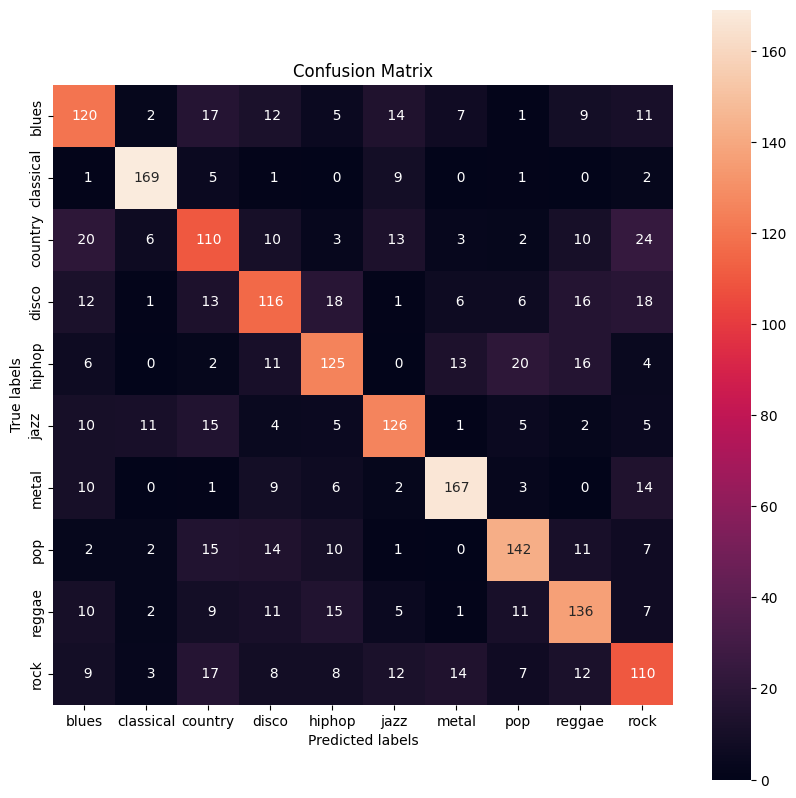

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   42.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

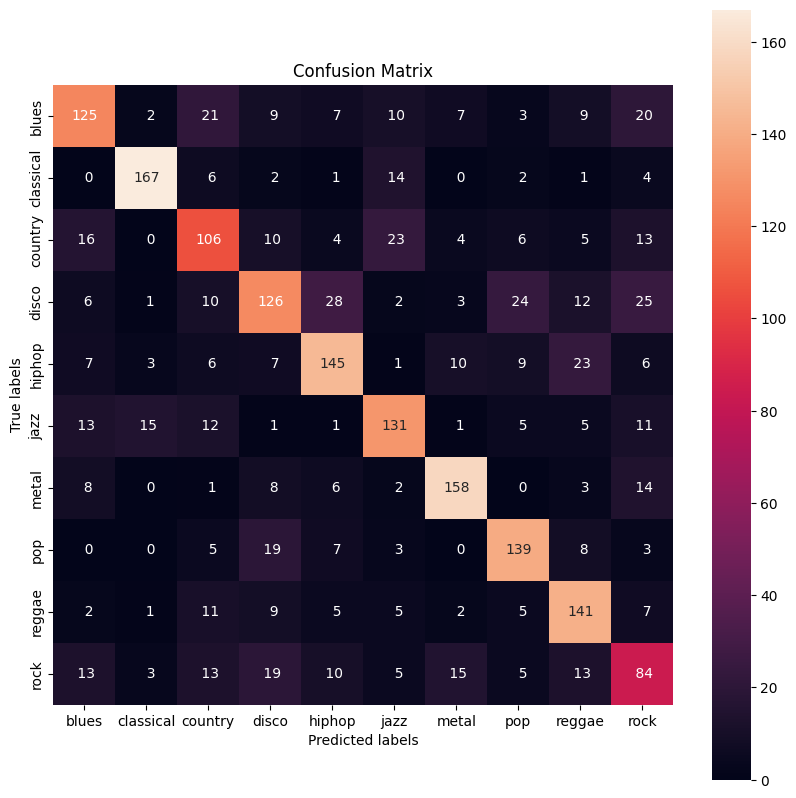

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   43.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

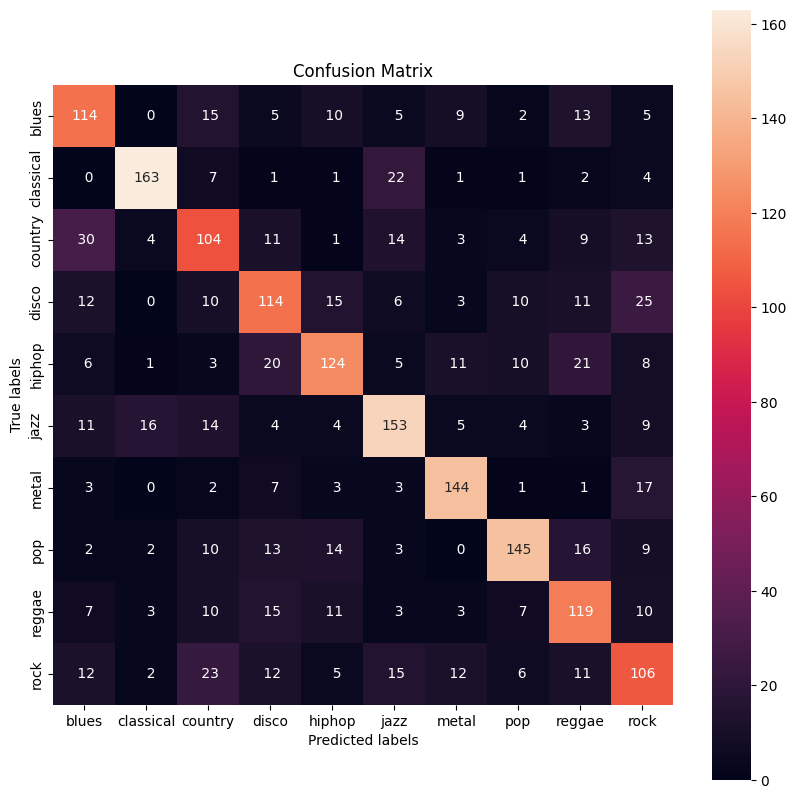

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   43.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'mfcc8_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

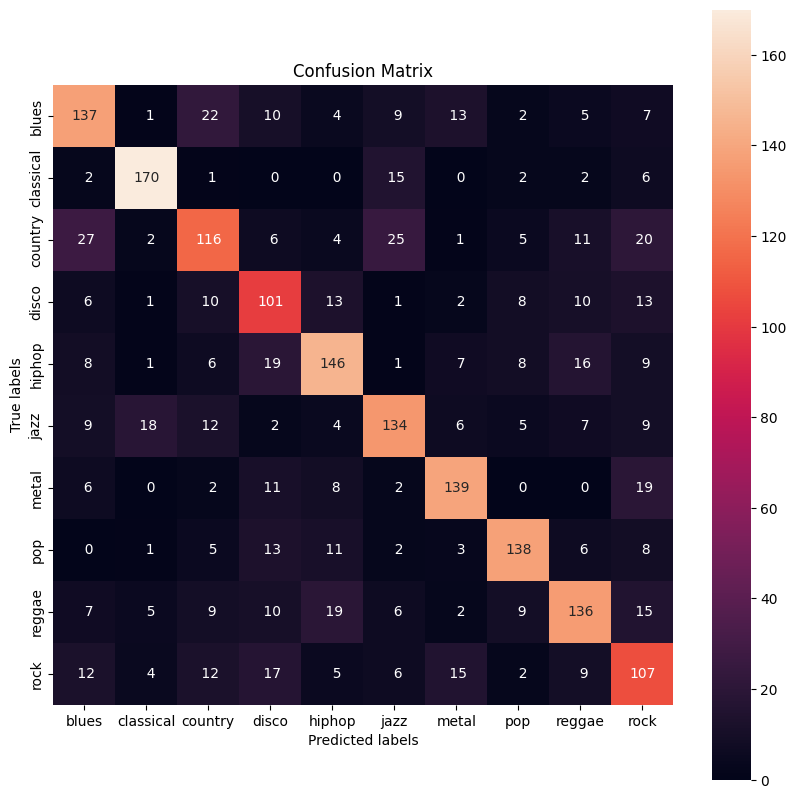

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   43.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_mean', 'mfcc8_var', 'zero_crossing_rate_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

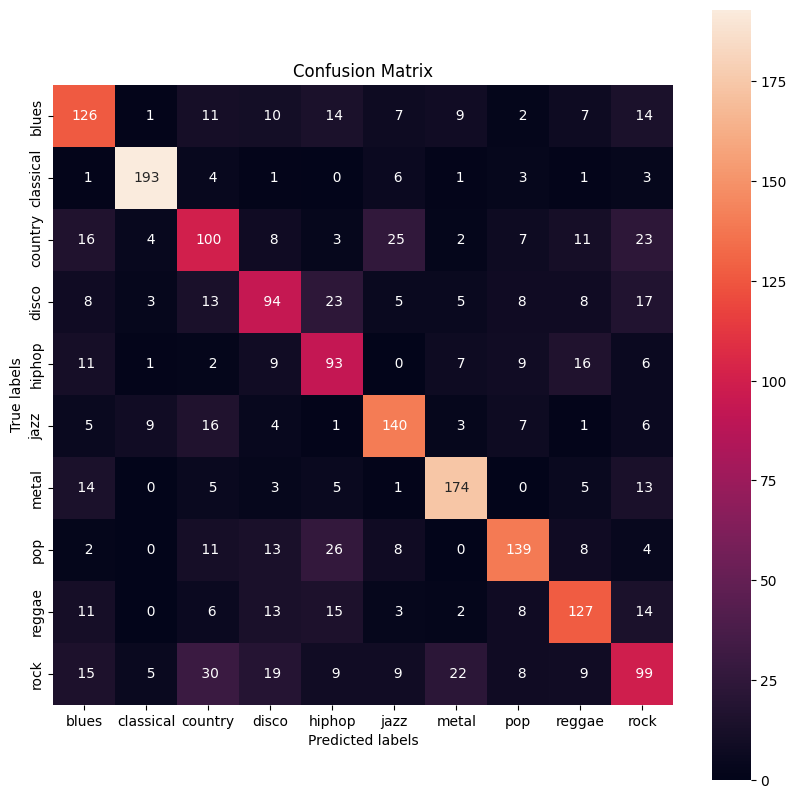



Average Accuracy:  0.6544544544544545


Total Time Required (in seconds):  7081.251686811447


In [115]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
f1score = list()
# Perform CV
X = data.drop(columns=['length','filename','songname','label'])

y = pd.Series(pd.Categorical(data.loc[:,'label']).codes)

for train, test in kfold.split(X):
    # Split data into train and test based on folds
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y[train], y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), num_simul=20, simul_type=0, simul_size=0.4,\
               sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.25)
    # Fit this above object on the train part and transform the train dataset into selected feature subset
    X_train = model.fit_transform(X_train, y_train)
    # Transform the test set as well
    X_test = model.transform(X_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    print("Feature importance: ", model.feat_imp_scores)
    # Convert the data into numpy arrays
    X_train, X_test = X_train.values, X_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = model.score(X_test, y_test)
    scores.append(score)
    print("Accuracy: ", score)
    print("\nF1 Score:", f1_score(y_test, preds, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, preds))
    print(dict(zip(cat_y.categories, range(10))))
    f,ax= plt.subplots(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='3d', square=True, \
                xticklabels=cat_y.categories, yticklabels=cat_y.categories, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end - start)


## Random Forest Classification with Markov Blanket

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc2_var', 'tempo']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294

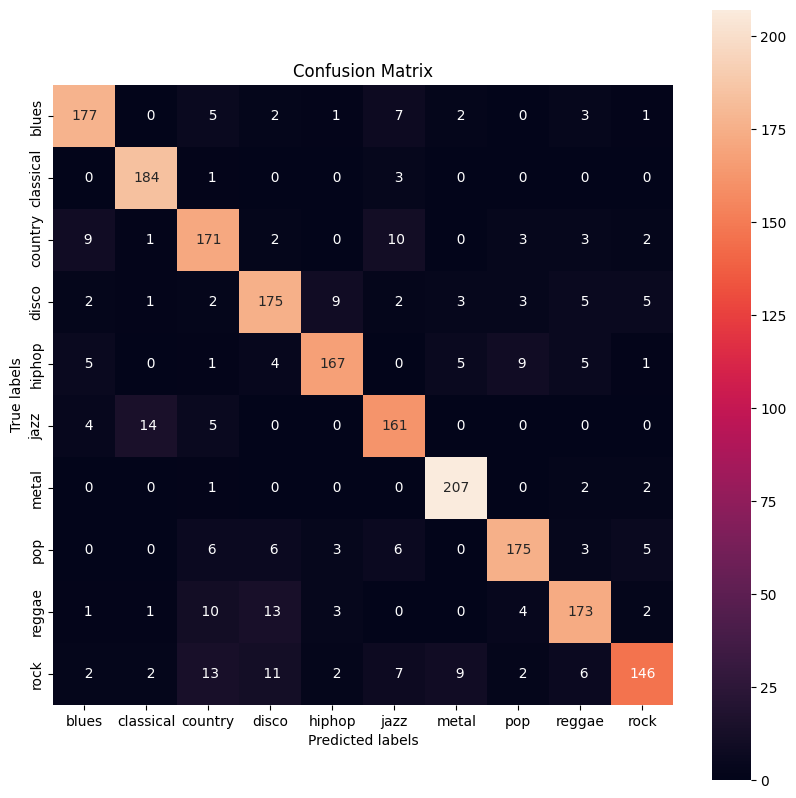

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   40.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

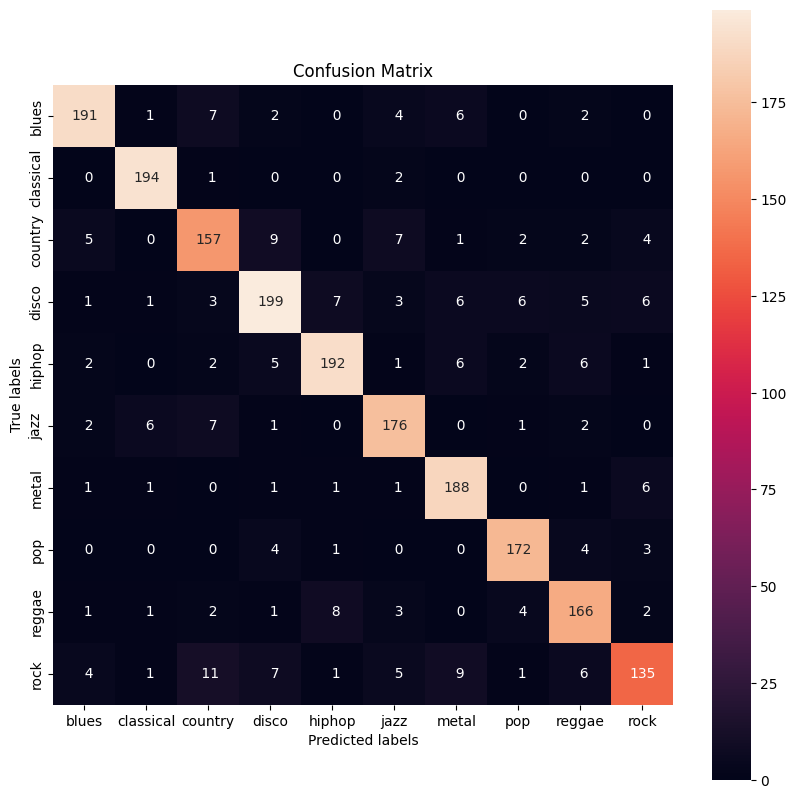

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   42.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

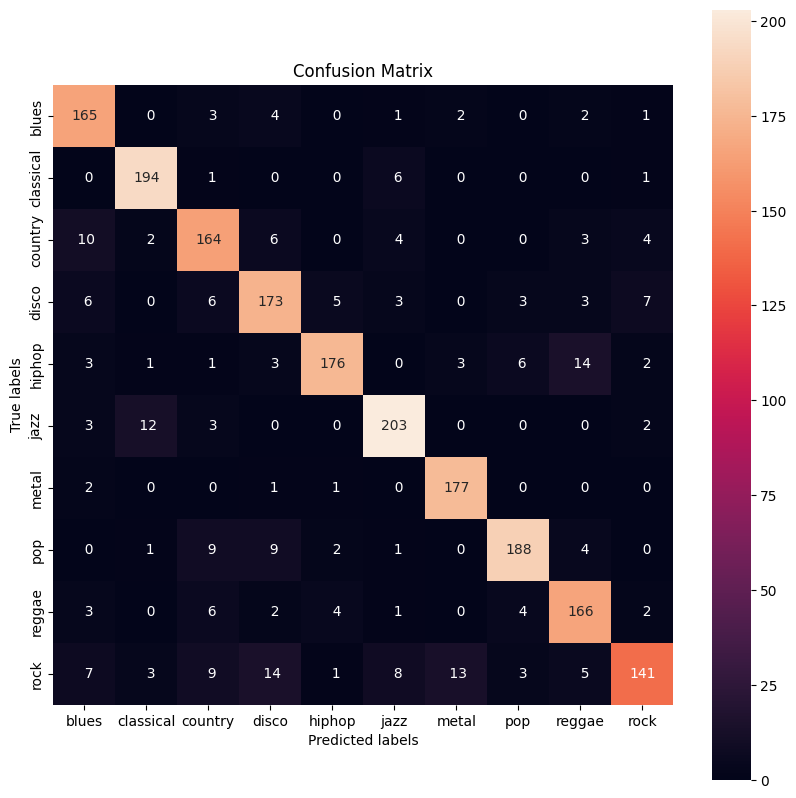

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   41.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'mfcc8_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

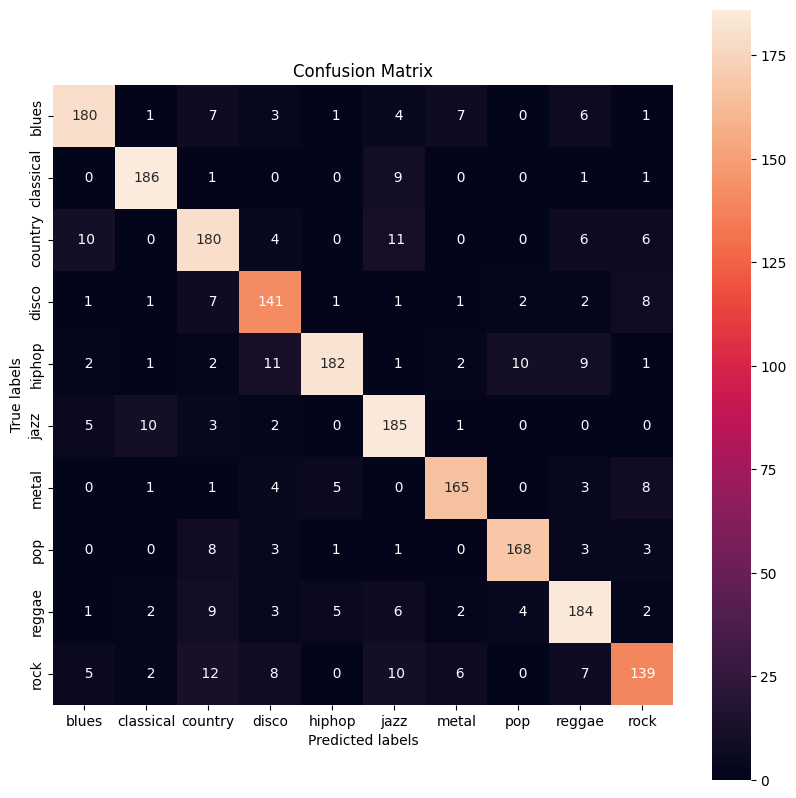

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   44.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_mean', 'mfcc8_var', 'zero_crossing_rate_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

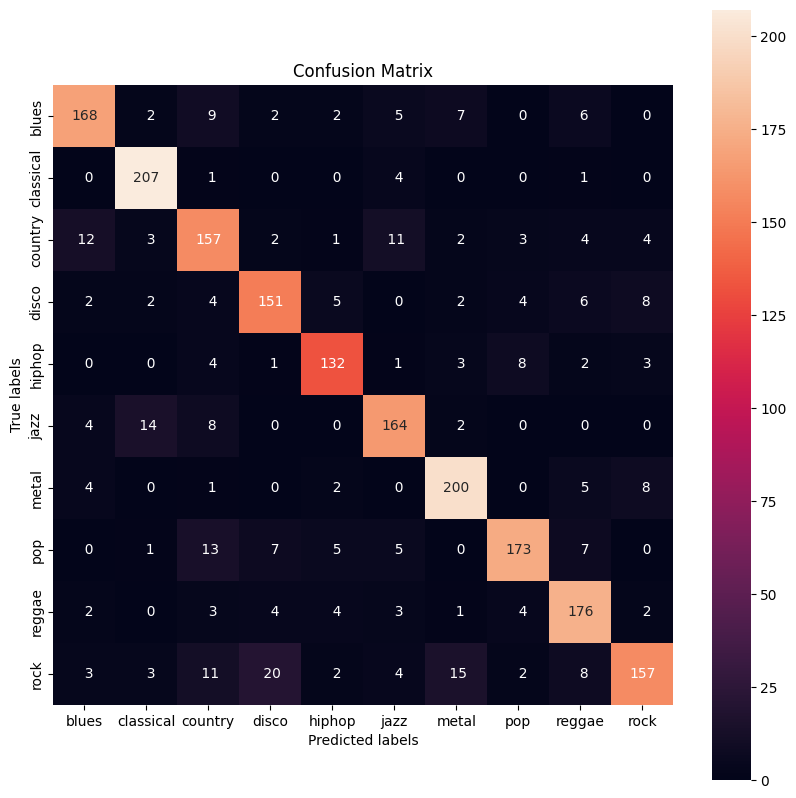



Average Accuracy:  0.8656656656656658


Total Time Required (in seconds):  9638.73130774498


In [114]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
X = data.drop(columns=['length','filename','songname','label'])

y = pd.Series(pd.Categorical(data.loc[:,'label']).codes)

for train, test in kfold.split(X):
    # Split data into train and test based on folds
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y[train], y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), num_simul=20, simul_type=0, simul_size=0.4,\
               sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.25)

    # Fit this above object on the train part and transform the train dataset into selected feature subset
    X_train = model.fit_transform(X_train, y_train)
    # Transform the test set as well
    X_test = model.transform(X_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    print("Feature importance: ", model.feat_imp_scores)
    # Convert the data into numpy arrays
    X_train, X_test = X_train.values, X_test.values
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    score = model.score(X_test, y_test)
    scores.append(score)
    print("Accuracy: ", score)
    print("\nF1 Score:", f1_score(y_test, preds, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, preds))
    print(dict(zip(cat_y.categories, range(10))))
    f,ax= plt.subplots(figsize=(10,10))
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='3d', square=True, \
                xticklabels=cat_y.categories, yticklabels=cat_y.categories, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    plt.show()

# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end - start)


## SVM Classification with Markov Blanket

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc2_var', 'tempo']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294

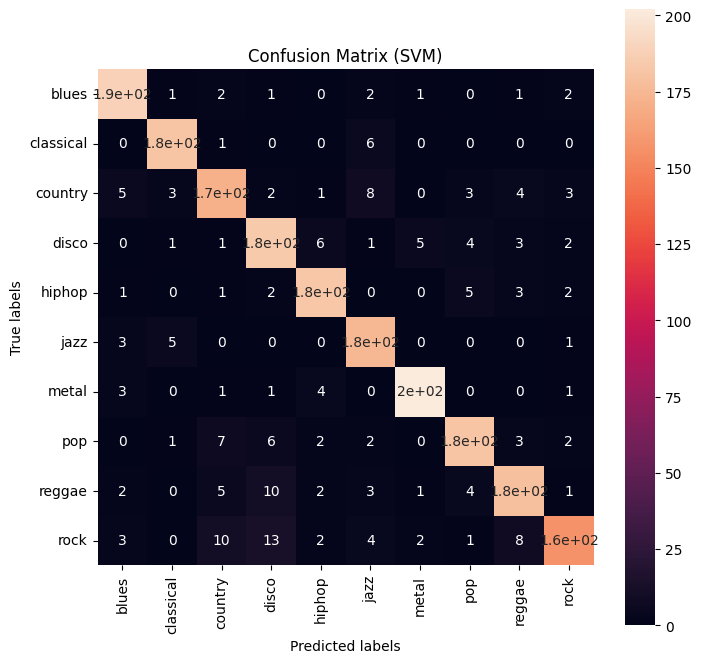

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   43.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

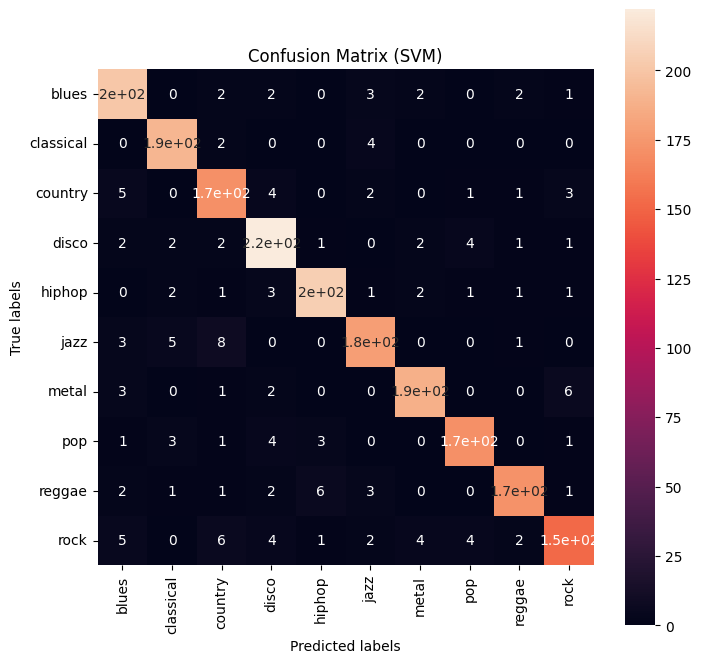

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   44.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

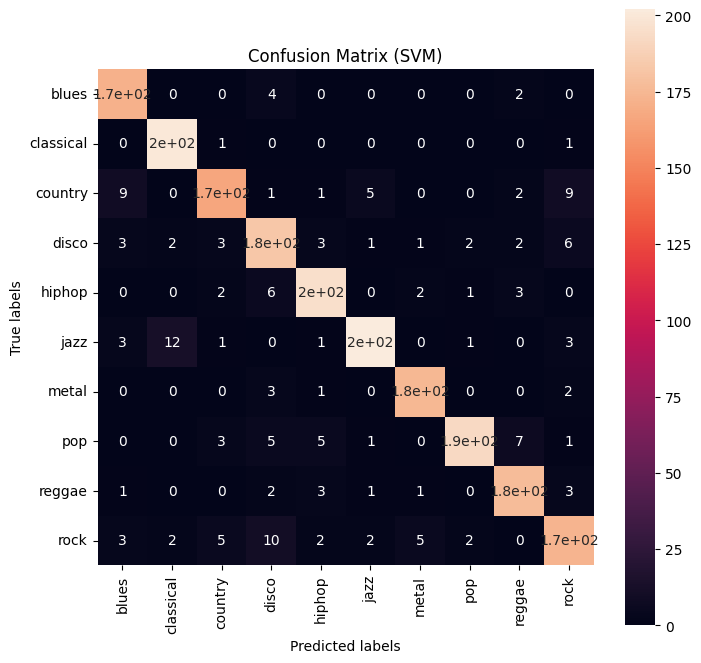

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   43.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   25.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'mfcc8_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

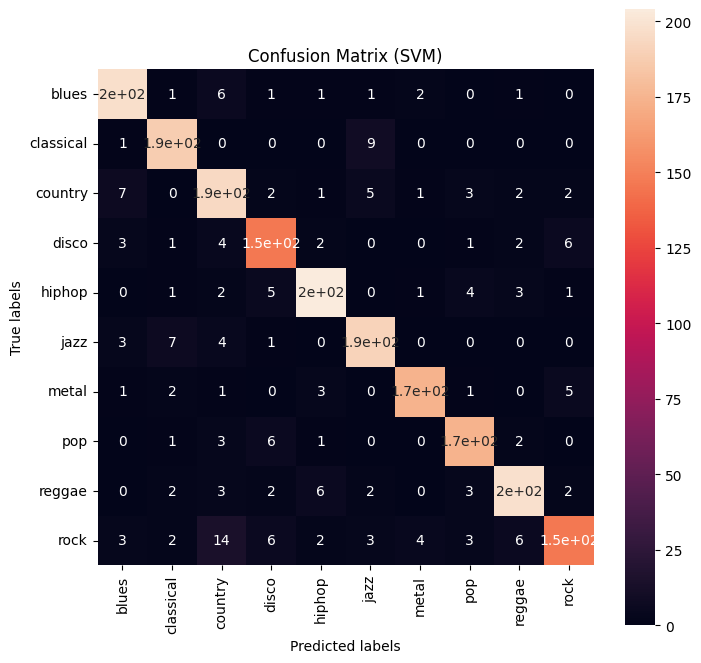

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:   42.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   24.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 

Markov Blanket:  ['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var', 'spectral_centroid_var', 'spectral_bandwidth_var', 'rolloff_mean', 'rolloff_var', 'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc3_mean', 'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var', 'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean', 'mfcc9_mean', 'mfcc10_mean', 'mfcc10_var', 'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean', 'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var', 'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean', 'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var', 'zero_crossing_rate_mean', 'mfcc8_var', 'zero_crossing_rate_var', 'mfcc9_var', 'mfcc2_var']
Feature importance:  [13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.862943611198906, 13.86294361119890

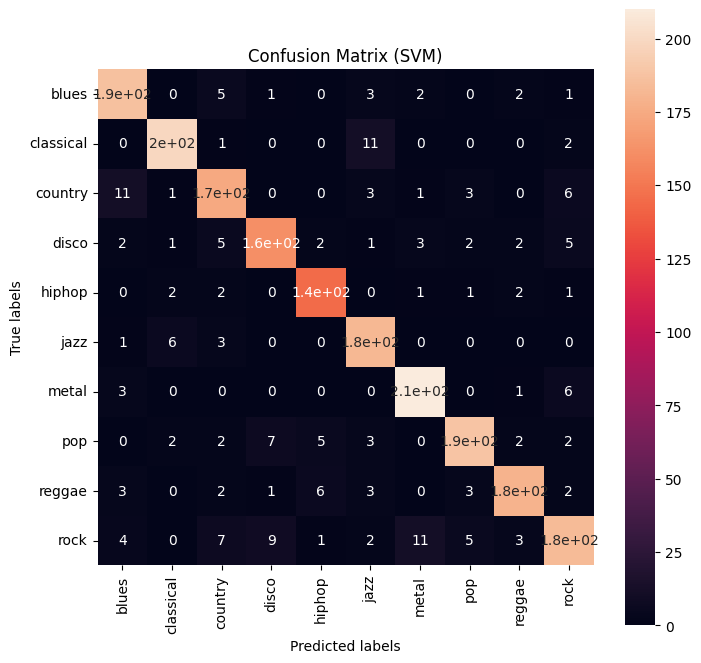



Average Accuracy:  0.9117117117117118


Total Time Required (in seconds):  7626.975445270538


In [111]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
X = data.drop(columns=['length','filename','songname','label'])

y = pd.Series(pd.Categorical(data.loc[:,'label']).codes)

for train, test in kfold.split(X):
    # Split data into train and test based on folds
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y[train], y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), num_simul=20, simul_type=0, simul_size=0.4,\
               sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.25)

    # Fit this above object on the train part and transform the train dataset into selected feature subset
    X_train = model.fit_transform(X_train, y_train)
    # Transform the test set as well
    X_test = model.transform(X_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    print("Feature importance: ", model.feat_imp_scores)
    # Convert the data into numpy arrays
    #####X_train, X_test = X_train.values, X_test.values
    
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns) # for SVM
    svc = SVC(kernel='rbf')
    param_grid1 = {'C': [10, 100], 'gamma': [0.1, 0.01, 0.001]} 
    cv = StratifiedKFold(n_splits=3, shuffle=True)  
    grid1 = GridSearchCV(svc, param_grid1, cv=cv, verbose = 1)
    grid1.fit(X_train_scaled, y_train) 
    print(grid1.best_estimator_)
    clf1 = grid1.best_estimator_
    clf1.fit(X_train_scaled, y_train)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns) 
    y_true = y_test.copy()
    y_pred1 = clf1.predict(X_test_scaled) # SVC 
    # For average accuracy 
    score = accuracy_score(y_true, y_pred1)
    scores.append(score)
    
    print('SVM Accuracy: ', score)
    print('SVM F1: ', f1_score(y_true, y_pred1, average='macro'))

    f,ax= plt.subplots(figsize=(8,8))
    sns.heatmap(confusion_matrix(y_true, y_pred1), annot=True, square=True, \
            xticklabels=cat_y.categories, yticklabels=cat_y.categories, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix (SVM)')
    plt.show()

# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end - start)